# Setup

In [58]:
import json
import os

def parse_ref(ref):
  masechet = ref.split(" ")[:-1]
  masechet= " ".join(masechet)
  loc1= ref.split(" ")[-1].split("-")[0]
  if(len(ref.split(" ")[1].split("-"))==1):
    return masechet,loc1,None
  else:
    loc2= ref.split(" ")[1].split("-")[1]
    return masechet,loc1,loc2
def daf_to_index(ref):
    daf = int(ref[:-1])
    amud= ref[-1]
    index= ((daf-1)*2)
    if(amud=="b"):
      index+= 1
    return index
def get_talmud_file(masechet):
    masechet = masechet.replace(" ","%20")
    with open("/Users/ephraimmeiri/gitEtc/Rashi Thesis work/talmud_files/"+masechet+".json") as f:
        data = json.load(f)
        return data
def get_talmud_text(ref):
    masechet,loc1,loc2= parse_ref(ref)
    text= ""
    with open("/Users/ephraimmeiri/gitEtc/Rashi Thesis work/talmud_files/"+masechet.replace(" ","%20")+".json") as f:
        data = json.load(f)
        index1,line1 = None,None # I'm doing it this way because of the multi-daf behavior
        if ":" not in loc1: # no line
            index1= daf_to_index(loc1)
        else: # has line
            index1= daf_to_index(loc1.split(":")[0])
            line1= int(loc1.split(":")[1])-1
        if loc2==None: # Since loc may have a line range (or just a single line)
            if ":" not in loc1: # no line
                text= data['text'][index1]
            else: # has line
                text= data['text'][index1][line1]
        elif not any(s in loc2 for s in ['a','b']): # loc 2 is a line within this daf
                text= data['text'][index1][line1:int(loc2)]
        else:
            if ":" not in loc2: # no line
                index2= daf_to_index(loc2)
                text= data['text'][index1:index2]
            else: # has
                index2= daf_to_index(loc2.split(":")[0])
                line2= int(loc2.split(":")[1])-1
                text = []
                for i in range(index1,index2+1):
                    # print(i)
                    if(i==index1):
                        text.append(data['text'][i][line1:][0])
                    elif(i==index2):
                        text.append(data['text'][i][:line2+1][0])
                    else:
                        text.append(data['text'][i][0])
    while isinstance(text, list):
        # Join the list into a single string
        text = ' '.join(text)
    return text



def get_rashi_file(masechet):
    masechet = masechet.replace("%20"," ")
    file = "/Users/ephraimmeiri/gitEtc/Rashi Thesis work/Rashi plaintext/json filtered/Rashi on "+masechet+".json"
    if os.path.exists(file):
        with open(file) as f:
            data = json.load(f)
            return data
    else:
        return None
def get_rashi_ref(ref,join=False):
    masechet,loc1,loc2= parse_ref(ref)
    rashi_file= get_rashi_file(masechet)
    if rashi_file is None:
        return None
    masechet,loc1,loc2= parse_ref(ref)
    text= ""
    with open("/Users/ephraimmeiri/gitEtc/Rashi Thesis work/Rashi plaintext/json filtered/Rashi on "+masechet.replace(" ","%20")+".json") as f:
        data = json.load(f)
        index1,line1 = None,None # I'm doing it this way because of the multi-daf behavior
        if ":" not in loc1: # no line
            index1= daf_to_index(loc1)
        else: # has line
            index1= daf_to_index(loc1.split(":")[0])
            line1= int(loc1.split(":")[1])-1
        if loc2==None: # Since loc may have a line range (or just a single line)
            if ":" not in loc1: # no line
                text= data['text'][index1]
            else: # has line
                text= data['text'][index1][line1]
        elif not any(s in loc2 for s in ['a','b']): # loc 2 is a line within this daf
                text= data['text'][index1][line1:int(loc2)]
        else:
            if ":" not in loc2: # no line
                index2= daf_to_index(loc2)
                text= data['text'][index1:index2]
            else: # has
                index2= daf_to_index(loc2.split(":")[0])
                line2= int(loc2.split(":")[1])-1
                text = []
                for i in range(index1,index2+1):
                    # print(i)
                    if(i==index1):
                        text.append(data['text'][i][line1:][0])
                    elif(i==index2):
                        text.append(data['text'][i][:line2+1][0])
                    else:
                        text.append(data['text'][i][0])
    if join:
        while isinstance(text, list):
            # Join the list into a single string
            text = ' '.join(text)
    return text

In [2]:
masechtot = ["Kodashim/Arakhin","Kodashim/Bekhorot", "Kodashim/Chullin","Kodashim/Keritot","Kodashim/Meilah","Kodashim/Menachot","Kodashim/Tamid","Kodashim/Temurah","Kodashim/Zevachim", 
             "Moed/Beitzah","Moed/Chagigah","Moed/Eruvin","Moed/Pesachim","Moed/Megillah","Moed/Moed%20Katan","Moed/Rosh%20Hashanah","Moed/Shabbat","Moed/Sukkah","Moed/Taanit","Moed/Yoma",
             "Nashim/Gittin","Nashim/Ketubot","Nashim/Kiddushin","Nashim/Nedarim","Nashim/Nazir","Nashim/Sotah","Nashim/Yevamot", 
             "Nezikin/Bava%20Batra","Nezikin/Bava%20Kamma","Nezikin/Bava%20Metzia","Nezikin/Avodah%20Zarah","Nezikin/Horayot","Nezikin/Makkot","Nezikin/Sanhedrin","Nezikin/Shevuot", 
             "Tahorot/Niddah", "Zeraim/Berakhot"]
masechtot_names= [s.split("/")[1] for s in masechtot]

In [3]:
mesorat_hashas_path2 = "/Users/ephraimmeiri/Downloads/mesorat_hashas_links.json"
# mesorat_hashas_df = pd.read_json(mesorat_hashas_file2)
mesorat_hashas_file = open(mesorat_hashas_path2)
mesorat_hashas_json = json.load(mesorat_hashas_file)
mesorat_hashas_filtered = [link for link in mesorat_hashas_json if link['refs'][0].split(" ")[0] in masechtot_names and link['refs'][0].split(" ")[0] in masechtot_names]
shas_refs= [(link['refs'][0],link['refs'][1]) for link in mesorat_hashas_filtered]

# Length distributions

(array([ 13., 148., 320., 351., 381., 348., 283., 199., 181., 160., 125.,
        103.,  79.,  62.,  51.,  35.,  41.,  33.,  21.,  27.,  22.,  22.,
         14.,  18.,  15.,   9.,  10.,  12.,   7.,   9.,   4.,   3.,   7.,
          1.,   2.,   2.,   3.,   2.,   4.,   2.,   1.,   1.,   1.,   4.,
          0.,   0.,   2.,   0.,   3.,   1.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  0.  ,   8.75,  17.5 ,  26.25,  35.  ,  43.75,  52.5 ,  61.25,
         70.  ,  78.75,  87.5 ,  96.25, 105.  , 113.75, 122.5 , 131.25,
        140.  , 148.75, 157.5 , 166.25, 175.  , 183.75, 192.5 , 201.25,
        210.  , 218.75, 227.5 , 236.25, 245.  , 253.75, 262.5 , 271.25,
        280.  , 288.75, 297.5 

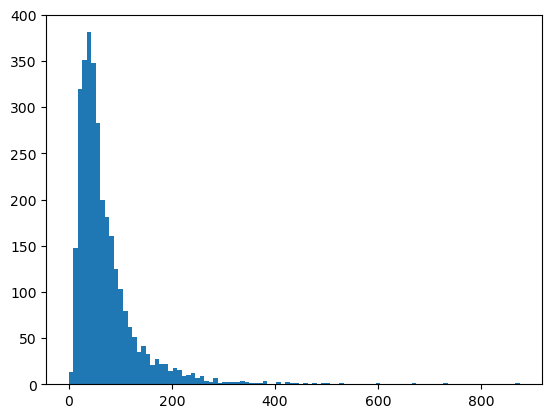

In [4]:
rashi_br = get_rashi_file("Berakhot")
rashi_br_lens = []

for daf in rashi_br['text']:
    for line in daf:
        lens = [len(dibbur) for dibbur in line]
        rashi_br_lens.extend(lens)
import matplotlib.pyplot as plt
plt.hist(rashi_br_lens, bins=100)

In [5]:
max(rashi_br_lens)

875

In [6]:
for daf in rashi_br['text']:
    for line in daf:
        for dibbur in line:
            if len(dibbur) == 875:
                print(dibbur)

שממאנין את הקטנ' – קטנה שהשיאתה אמה לאחר מיתת אביה דמדאורייתא אין קדושיה כלום שהרי קטנה אינה בת דעת ואת אמה לא זכתה תורה להיות לה כח לקדשה אלא לאב שנאמר את בתי נתתי לאיש הזה (דברי' כב) ומיהו רבנן תקינו לה קדושין להצריכה מיאון כדי שישאוה ולא תצא לזנות לפיכך אם מיאנה לאחר זמן ואמרה אי אפשי בו יוצאת ומותרת לכל אדם ואינה צריכה הימנו גט והעיד ר' יהודה בן בבא שפעמים שמצוה על בית דין ללמדה שתמאן בו כגון שני אחים נשואין שתי אחיות יתומות אחת גדולה וקדושיה קדושי תורה ואחת קטנה שאין קדושיה אלא מדרבנן ומת בעלה של גדולה בלא בנים ונפלה לפני אחיו ליבום ונמצאת זקוקה לו מן התורה וזיקה זו אוסרת את אשתו עליו משום אחות זקוקה שהיא כאחות אשתו וא"ר אליעזר במסכת יבמות (דף קט.) מלמדין קטנה זו שתמאן בבעלה ותעקור קדושיה למפרע ותעשה כל בעילותיה כאלו הן של זנות כדי להתיר את בעלה ליבם את אחותה דתנן נושאין על האנוסה ועל המפותה (יבמות דף צז.) והעיד רבי יהודה בן בבא ביום שנשנית עדיות שהלכה כר"א:


In [7]:
for masecta in masechtot_names:
    print(masecta.replace("%20"," "))

Arakhin
Bekhorot
Chullin
Keritot
Meilah
Menachot
Tamid
Temurah
Zevachim
Beitzah
Chagigah
Eruvin
Pesachim
Megillah
Moed Katan
Rosh Hashanah
Shabbat
Sukkah
Taanit
Yoma
Gittin
Ketubot
Kiddushin
Nedarim
Nazir
Sotah
Yevamot
Bava Batra
Bava Kamma
Bava Metzia
Avodah Zarah
Horayot
Makkot
Sanhedrin
Shevuot
Niddah
Berakhot


no rashi for Meilah
no rashi for Tamid
no rashi for Moed Katan
no rashi for Taanit
no rashi for Nedarim
no rashi for Nazir
no rashi for Horayot


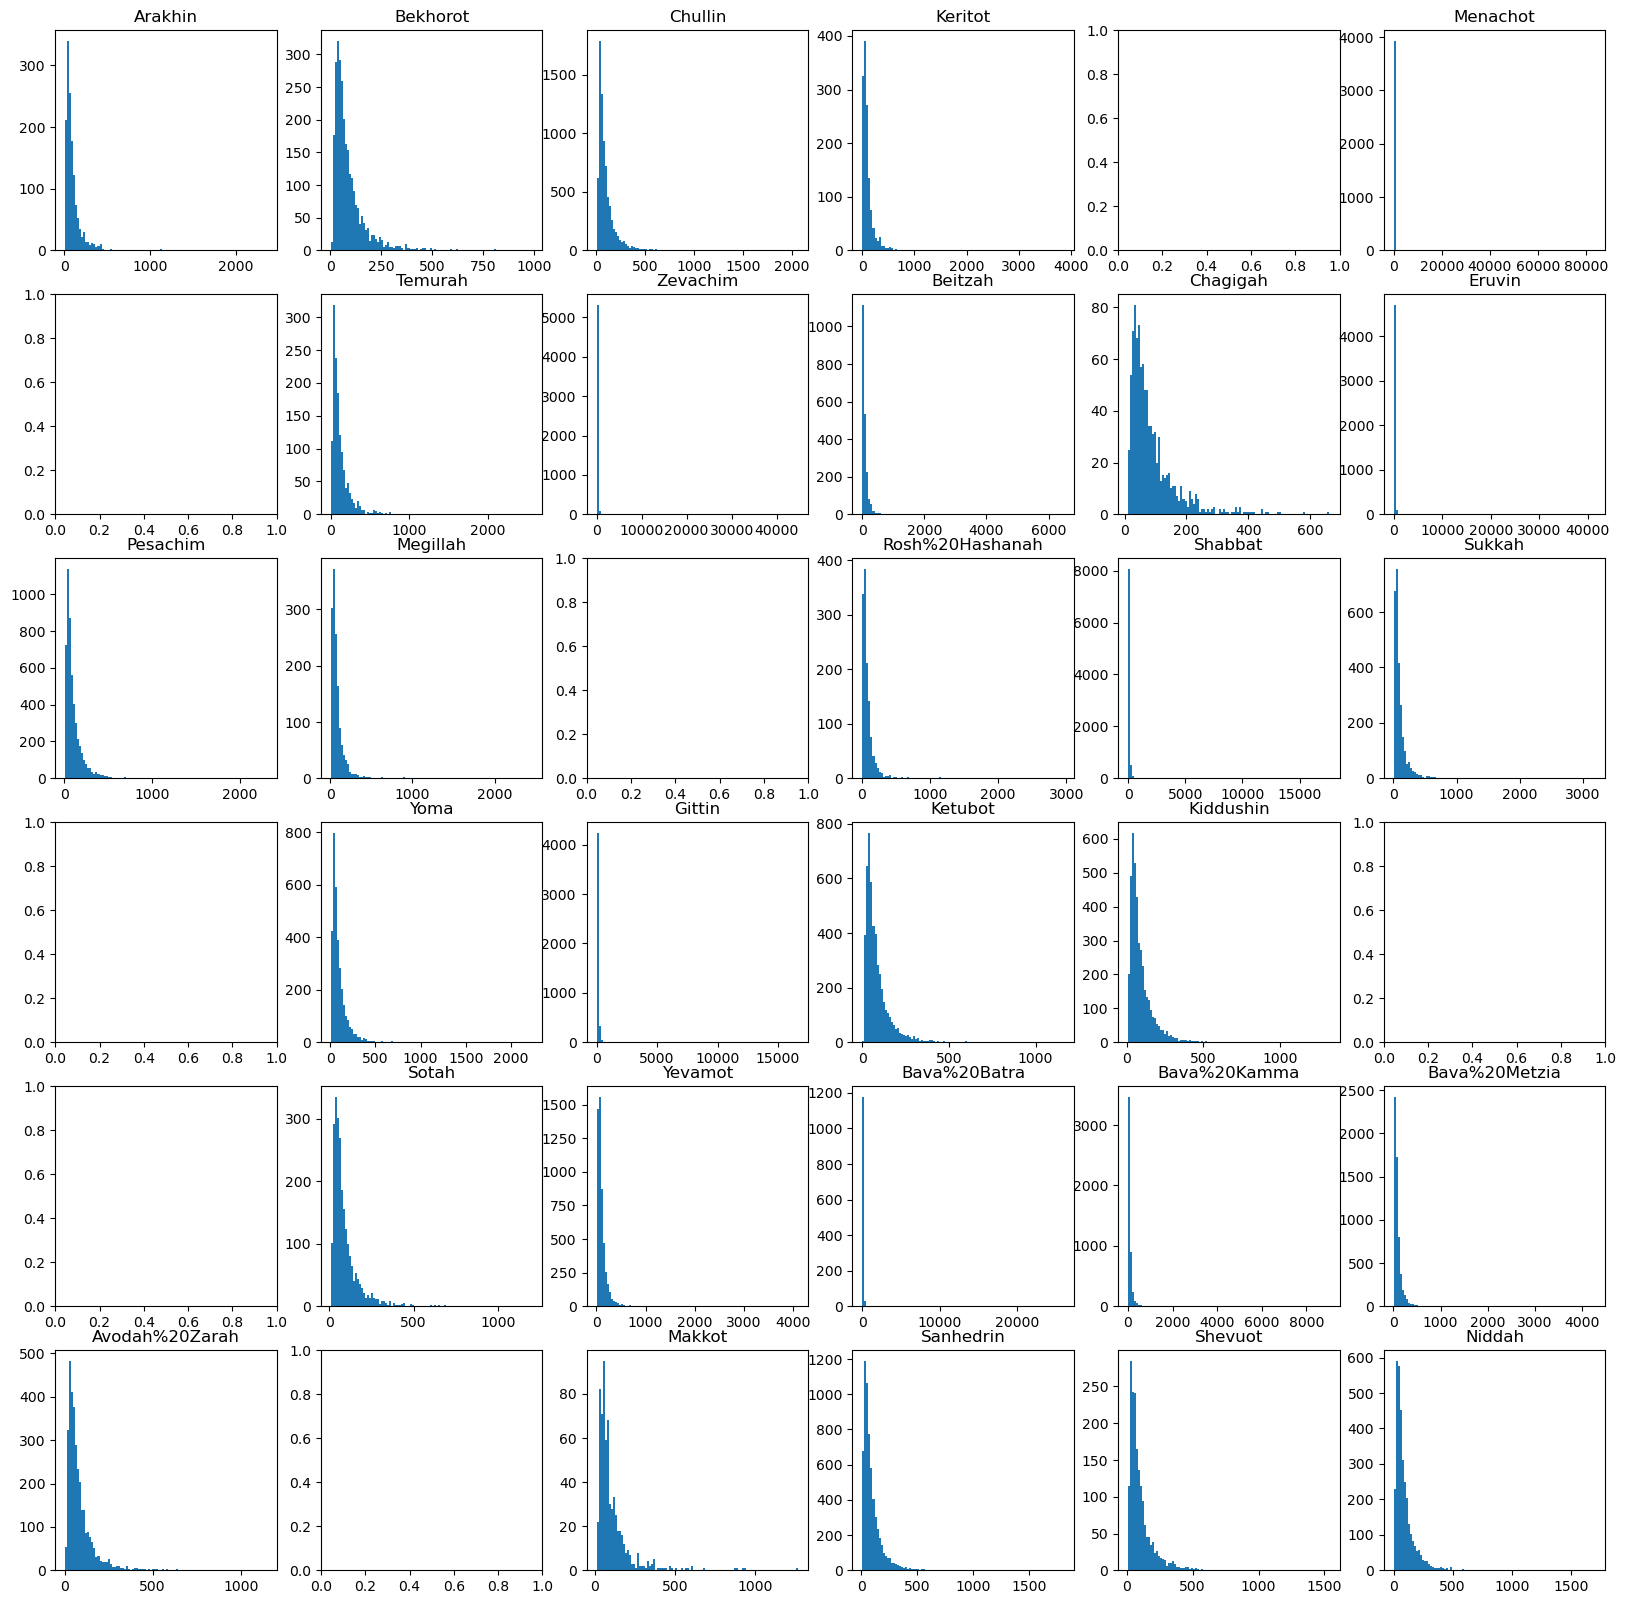

In [8]:
def get_len_arr(masechet):
    rashi = get_rashi_file(masechet)
    rashi_lens = []
    if rashi is None:
        print(f"no rashi for {masechet}")
        return []
    for daf in rashi['text']:
        for line in daf:
            lens = [len(dibbur) for dibbur in line]
            rashi_lens.extend(lens)
    return rashi_lens
lens = [get_len_arr(masechet.replace("%20"," ")) for masechet in masechtot_names]
filt_names = []
# lens = [l for l in lens if l]
# plot the length distributions
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    if lens[i] == []:
        continue
    filt_names.append(masechtot_names[i])
    if i < len(lens):
        ax.hist(lens[i], bins=100)
        ax.set_title(masechtot_names[i])
    else:
        ax.axis('off')

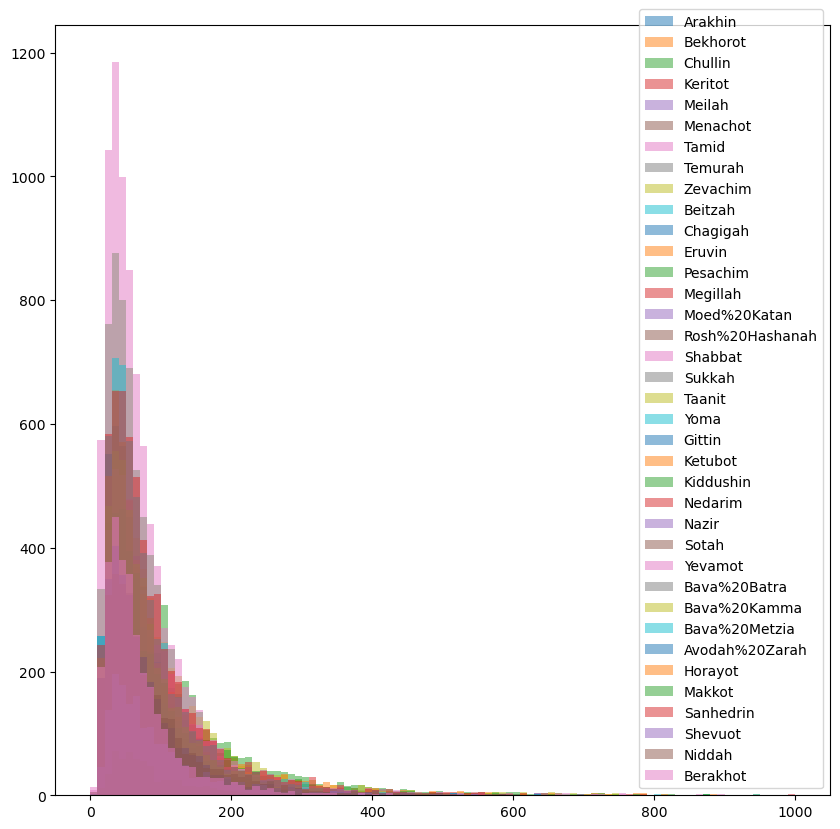

In [9]:
# plot the length distributions overlayed on each other
# With a cuttoff to avoid the most frequent lengths from dominating the plot
fig, ax = plt.subplots(figsize=(10, 10))
for i, l in enumerate(lens):
    ax.hist(l, bins=100, alpha=0.5, label=masechtot_names[i], range=(0, 1000))
ax.legend()

In [10]:
# stats on the length distributions
import pandas as pd
lens_filt=[]
masechtot_names_filt=[]
for i, l in enumerate(lens):
   if l == []:
       continue
   else:
       lens_filt.append(l)
       masechtot_names_filt.append(masechtot_names[i])
dist_df = pd.DataFrame(lens_filt).transpose()
dist_df.columns = masechtot_names_filt
# drop the empty columns, when count is 0
dist_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Arakhin,1415.0,103.850883,123.550062,11.0,45.00,72.0,120.0,2363.0
Bekhorot,2758.0,90.397027,86.562207,3.0,39.00,64.0,110.0,993.0
Chullin,7509.0,97.978293,110.428793,3.0,39.00,65.0,116.0,2066.0
Keritot,1343.0,104.713328,139.402083,3.0,42.00,73.0,122.5,3862.0
Menachot,3952.0,155.385881,1625.347155,11.0,41.00,66.0,114.0,83901.0
Temurah,1390.0,125.808633,145.348357,5.0,49.25,85.0,151.0,2570.0
Zevachim,5426.0,128.908035,842.281973,10.0,47.00,78.0,136.0,44735.0
Beitzah,2059.0,101.593492,174.485823,10.0,39.00,68.0,122.0,6485.0
Chagigah,983.0,88.780264,78.911940,11.0,39.00,64.0,110.0,663.0
Eruvin,4871.0,259.965100,1759.206201,10.0,43.00,72.0,133.0,41527.0


In [20]:
import numpy as np
lens2= zip(lens_filt,masechtot_names_filt)
lens2= sorted(lens2,key=lambda x: np.percentile(x[0], 75))

In [73]:
for l,n in lens2:
    print(n, np.percentile(l, 75))
    # print()

Berakhot 86.0
Shabbat 95.0
Bava%20Batra 98.0
Gittin 99.0
Megillah 100.0
Ketubot 103.0
Avodah%20Zarah 103.0
Bava%20Metzia 104.0
Rosh%20Hashanah 106.0
Bava%20Kamma 107.0
Bekhorot 110.0
Chagigah 110.0
Sotah 111.0
Menachot 114.0
Kiddushin 114.0
Niddah 114.0
Sanhedrin 115.0
Chullin 116.0
Yoma 118.0
Arakhin 120.0
Sukkah 120.0
Beitzah 122.0
Keritot 122.5
Yevamot 124.0
Makkot 128.0
Shevuot 128.0
Pesachim 129.0
Eruvin 133.0
Zevachim 136.0
Temurah 151.0


In [33]:
len(lens2)

30

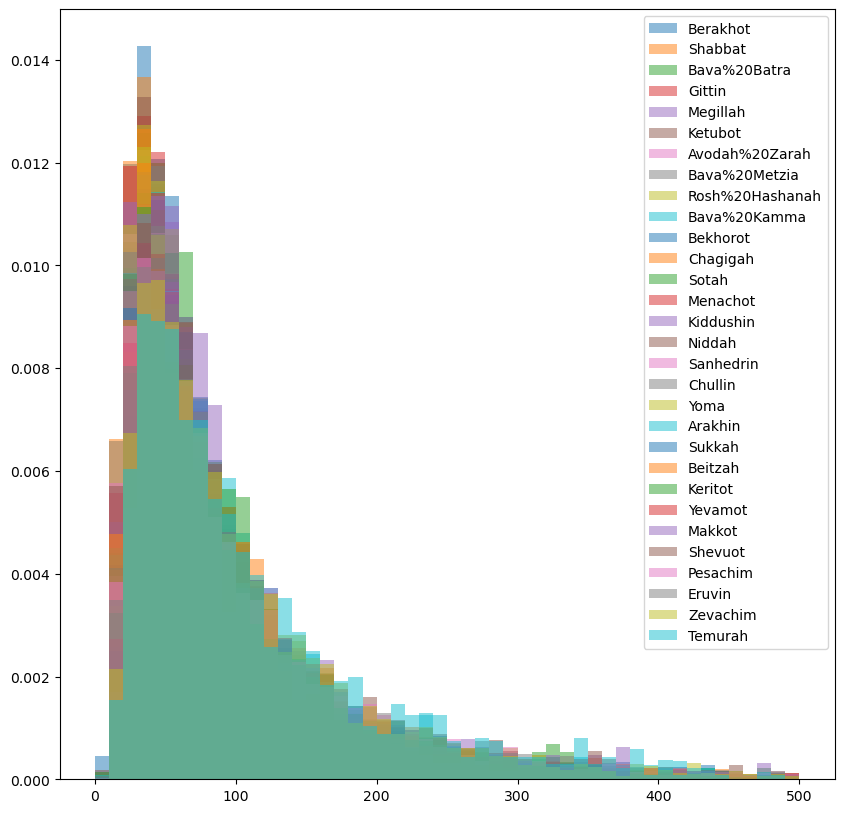

In [71]:
# plot the length distributions overlayed on each other
# With a cuttoff to avoid the most frequent lengths from dominating the plot
fig, ax = plt.subplots(figsize=(10, 10))
for l, n in lens2:
    ax.hist(l, bins=50, alpha=0.5, label=n, range=(0, 500), density=True)
ax.legend()

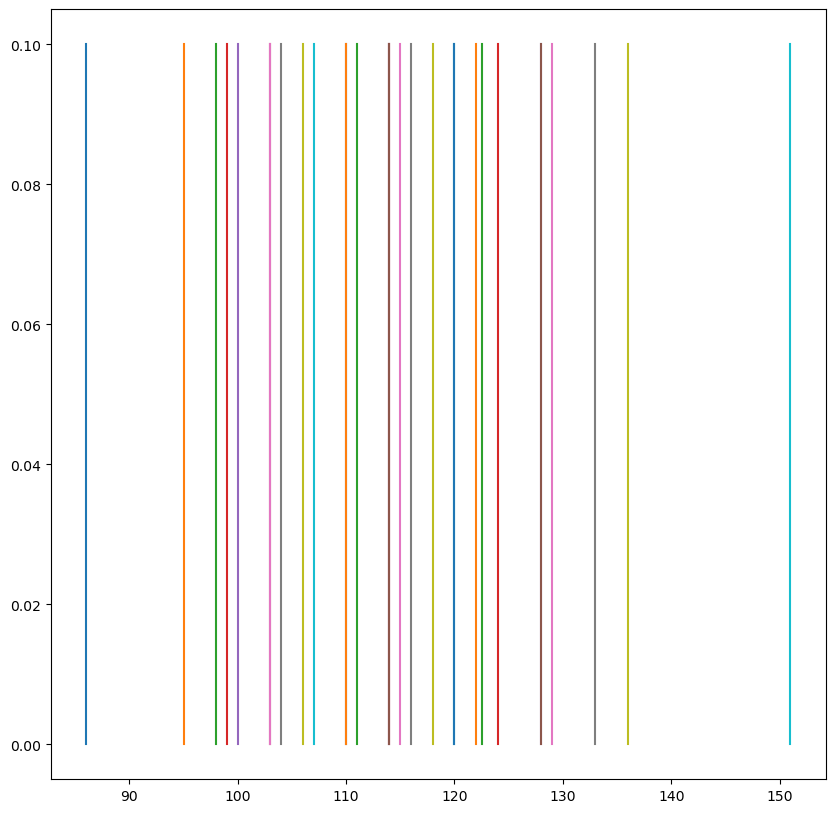

In [38]:
# plot percentile on a line
fig, ax = plt.subplots(figsize=(10, 10))
for l,n in lens2:
    percetile_75 = np.percentile(l, 75)
    ax.plot([percetile_75, percetile_75], [0, 0.1], label=n)

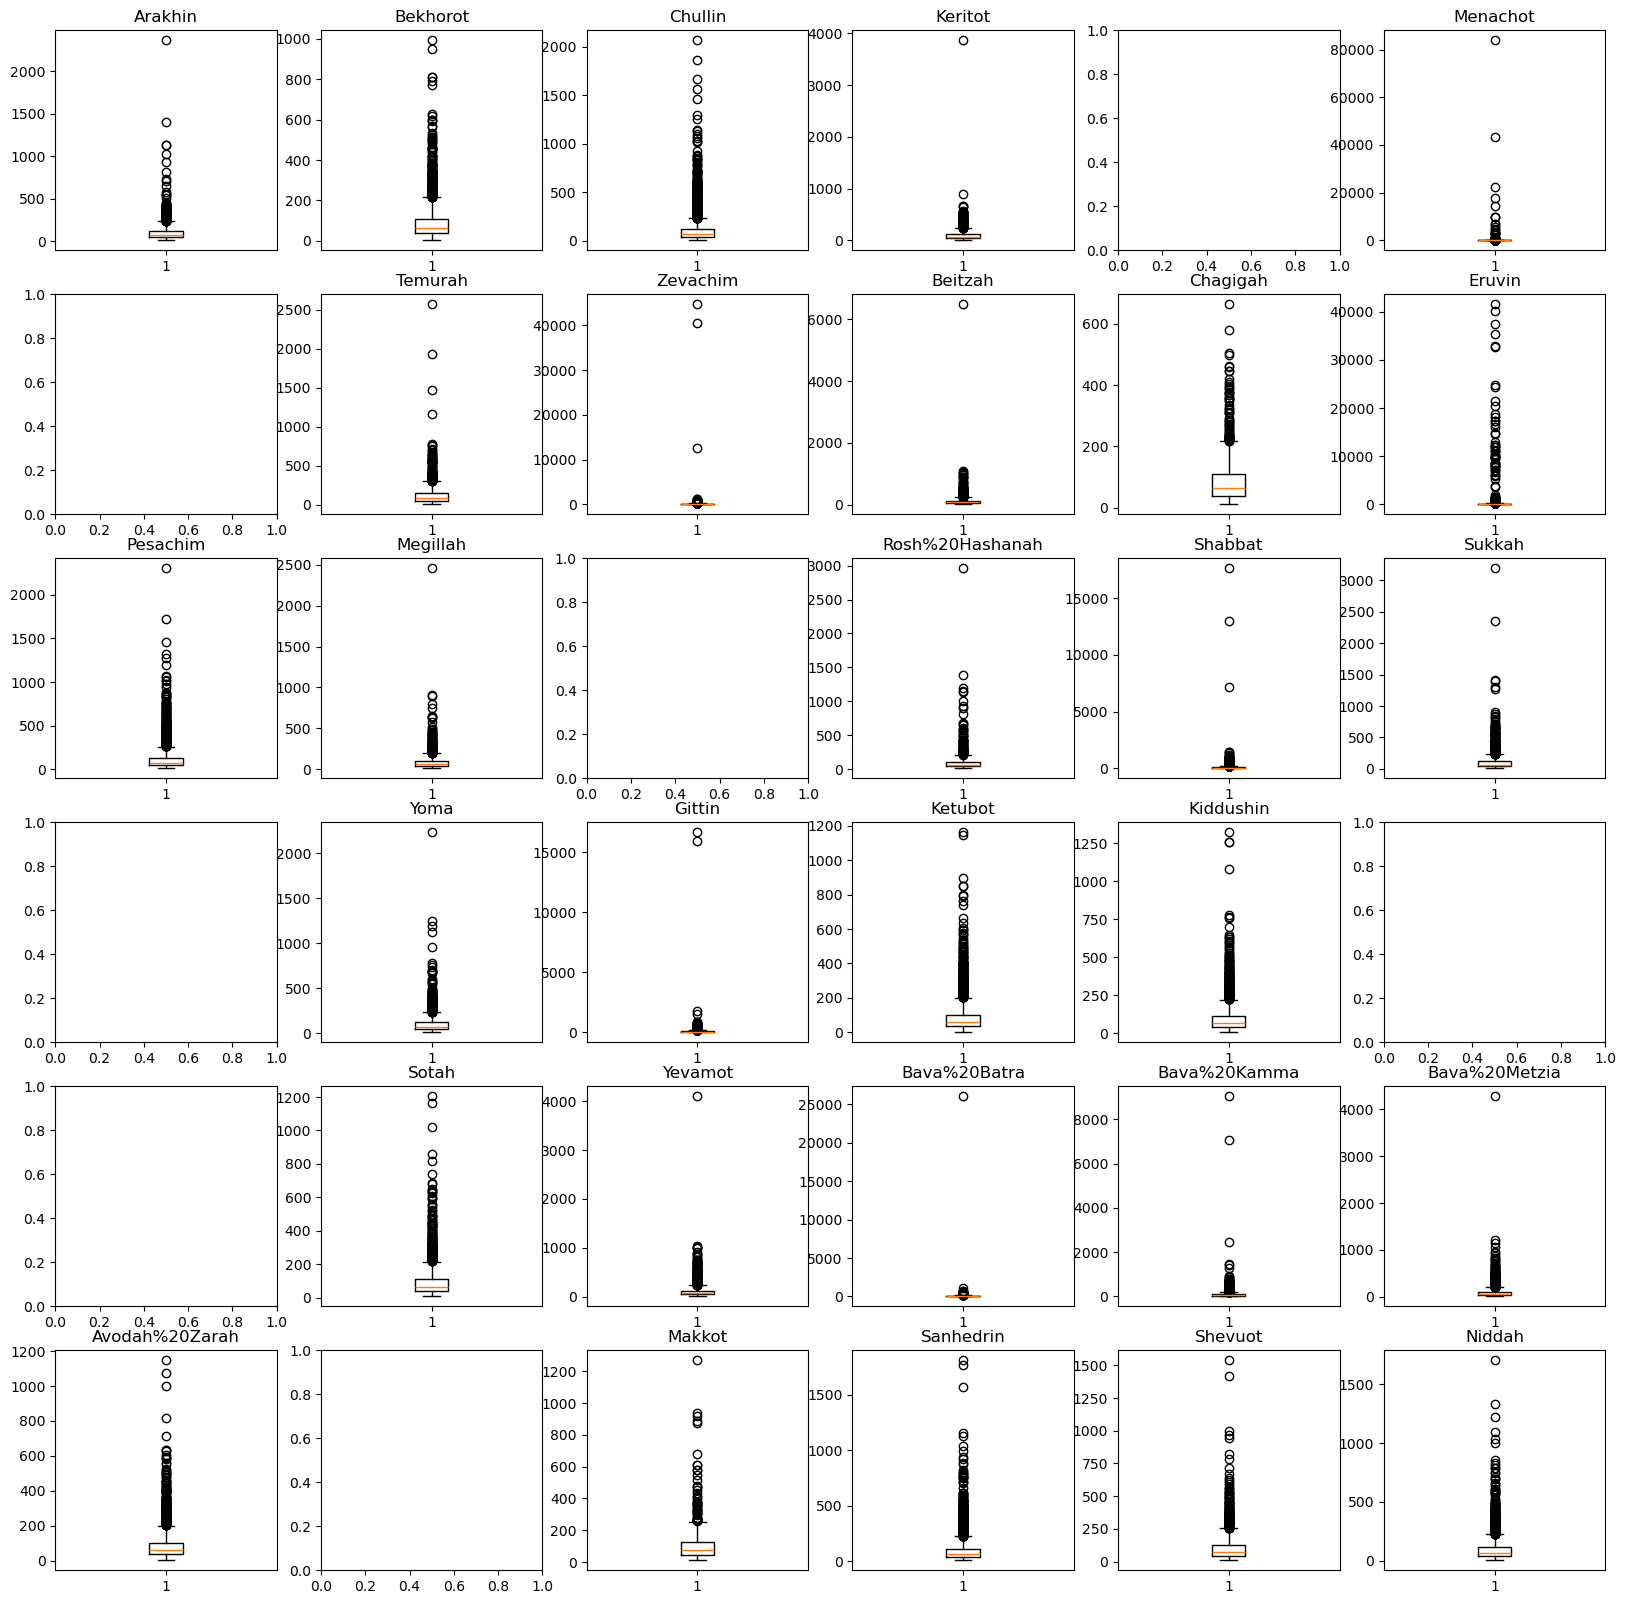

In [67]:
# Box and whisker plot, side by side in separate plots rather than overlayed
fig, axs = plt.subplots(6, 6, figsize=(20, 20))
for i, ax in enumerate(axs.flat):
    if lens[i] == []:
        continue
    filt_names.append(masechtot_names[i])
    if i < len(lens):
        ax.boxplot(lens[i])
        ax.set_title(masechtot_names[i])
    else:
        ax.axis('off')

# Use of ל"א

In [41]:
def get_LA_count(masechet):
    rashi = get_rashi_file(masechet)
    la_count = 0
    if rashi is None:
        print(f"no rashi for {masechet}")
        return 0
    for daf in rashi['text']:
        for line in daf:
            for dibbur in line:
                la_count+=dibbur.count("ל\"א")
                la_count+=dibbur.count("לישנא אחרינא")
    return la_count

In [48]:
masechtot_names_filt=[name.replace("%20"," ") for name in masechtot_names_filt]

In [51]:
masechtot_names_filt

['Arakhin',
 'Bekhorot',
 'Chullin',
 'Keritot',
 'Menachot',
 'Temurah',
 'Zevachim',
 'Beitzah',
 'Chagigah',
 'Eruvin',
 'Pesachim',
 'Megillah',
 'Rosh Hashanah',
 'Shabbat',
 'Sukkah',
 'Yoma',
 'Gittin',
 'Ketubot',
 'Kiddushin',
 'Sotah',
 'Yevamot',
 'Bava Batra',
 'Bava Kamma',
 'Bava Metzia',
 'Avodah Zarah',
 'Makkot',
 'Sanhedrin',
 'Shevuot',
 'Niddah',
 'Berakhot']

In [59]:
la_counts = [get_LA_count(masechet) for masechet in masechtot_names_filt]

In [60]:
la_counts= zip(la_counts,masechtot_names_filt)

In [61]:
la_counts = sorted(la_counts,key=lambda x: x[0])

In [62]:
la_counts

[(0, 'Megillah'),
 (1, 'Chagigah'),
 (1, 'Makkot'),
 (1, 'Shevuot'),
 (2, 'Yoma'),
 (4, 'Beitzah'),
 (5, 'Rosh Hashanah'),
 (5, 'Sotah'),
 (5, 'Berakhot'),
 (6, 'Kiddushin'),
 (6, 'Bava Batra'),
 (7, 'Sukkah'),
 (7, 'Ketubot'),
 (9, 'Gittin'),
 (10, 'Keritot'),
 (10, 'Zevachim'),
 (11, 'Bava Metzia'),
 (12, 'Sanhedrin'),
 (20, 'Arakhin'),
 (22, 'Niddah'),
 (29, 'Pesachim'),
 (29, 'Avodah Zarah'),
 (33, 'Bekhorot'),
 (34, 'Yevamot'),
 (35, 'Temurah'),
 (42, 'Eruvin'),
 (52, 'Chullin'),
 (56, 'Bava Kamma'),
 (58, 'Shabbat'),
 (69, 'Menachot')]

In [69]:
sum([l[0] for l in la_counts])

581

# References2

# What Percentage of lines have a comment?
- Will need to manually fix for the sections where I have removed the questionable sections (Zevachim and Menachot)

In [13]:
import os
import json
import pandas as pd

In [14]:
base = "/Users/ephraimmeiri/gitEtc/Rashi Thesis work/Rashi plaintext/json undisputed"
masechtot= [n for n in os.listdir(base) if n.endswith(".json") and not n[0]=="."]
lengths= dict()
for mas in masechtot:
    print(mas)
    with open(os.path.join(base,mas),"r") as f:
        file = json.load(f)
    mas_lens=[]
    for daf in file['text']:
        lens=[]
        for line in daf:
            lens.append(len(line))
        if lens:
            mas_lens.extend(lens)
    lengths[mas]= mas_lens

Rashi on Bava Kamma.json
Rashi on Sanhedrin.json
Rashi on Bava Batra.json
Rashi on Avodah Zarah.json
Rashi on Makkot.json
Rashi on Yevamot.json
Rashi on Kiddushin.json
Rashi on Niddah.json
Rashi on Pesachim.json
Rashi on Menachot.json
Rashi on Sukkah.json
Rashi on Yoma.json
Rashi on Sotah.json
Rashi on Shevuot.json
Rashi on Temurah.json
Rashi on Gittin.json
Rashi on Bekhorot.json
Rashi on Berakhot.json
Rashi on Arakhin.json
Rashi on Chullin.json
Rashi on Rosh Hashanah.json
Rashi on Ketubot.json
Rashi on Zevachim.json
Rashi on Megillah.json
Rashi on Beitzah.json
Rashi on Shabbat.json
Rashi on Eruvin.json
Rashi on Bava Metzia.json
Rashi on Chagigah.json
Rashi on Keritot.json


In [17]:
ratios= []
for name in lengths:
    lens= lengths[name]
    lengh = len(lens)
    zeros= len([n for n in lens if n==0])
    ratios.append((name,zeros/lengh))
zero_ratio_df = pd.DataFrame([(n[9:-5],v) for n,v in ratios],columns=["Name","Ratio"])
sorted(ratios,key=lambda x:x[1],reverse=True)

[('Rashi on Berakhot.json', 0.35392829900839057),
 ('Rashi on Keritot.json', 0.3094059405940594),
 ('Rashi on Megillah.json', 0.3091993185689949),
 ('Rashi on Bava Kamma.json', 0.3010805500982318),
 ('Rashi on Shevuot.json', 0.2993931220498989),
 ('Rashi on Arakhin.json', 0.2922297297297297),
 ('Rashi on Niddah.json', 0.28319579894973745),
 ('Rashi on Temurah.json', 0.28236316246741966),
 ('Rashi on Rosh Hashanah.json', 0.26899383983572894),
 ('Rashi on Chagigah.json', 0.25604551920341395),
 ('Rashi on Makkot.json', 0.2514395393474088),
 ('Rashi on Yevamot.json', 0.23703901656867984),
 ('Rashi on Menachot.json', 0.22581521739130433),
 ('Rashi on Eruvin.json', 0.22063854047890535),
 ('Rashi on Avodah Zarah.json', 0.21127450980392157),
 ('Rashi on Bava Metzia.json', 0.2066420664206642),
 ('Rashi on Bekhorot.json', 0.20531154239019409),
 ('Rashi on Sanhedrin.json', 0.20526838966202784),
 ('Rashi on Sotah.json', 0.20277078085642317),
 ('Rashi on Pesachim.json', 0.20232073787563226),
 ('Ras

In [18]:
zero_ratio_df

,Name,Ratio
0,Bava Kamma,0.301081
1,Sanhedrin,0.205268
2,Bava Batra,0.191197
3,Avodah Zarah,0.211275
4,Makkot,0.251440
5,Yevamot,0.237039
6,Kiddushin,0.151307
7,Niddah,0.283196
8,Pesachim,0.202321
9,Menachot,0.225815


In [6]:
challanges_df = pd.read_excel("/Users/ephraimmeiri/Documents/רשי research docs/רשי תגובה וחידוש/לשונות ביקורת/כל לשונות ביקורת.xlsx")

In [7]:
challanges_df.head()

,Masechet,Daf,Loc,Text,החיפוש,מקשה על
0,Chullin,83a,"4,0",דלית ביה כזית - בקמא או בבתרא אלא בחד מינייהו ...,אין נראה,NaN
1,Pesachim,25a,"4,1",מנבילה - ונבילה אכילה כתיבא ביה נבילה לאו דוקא...,אין נראה,NaN
2,Sukkah,46b,"3,0",מיד תינוקות שומטין כו' - בשביעי קאי במתני' ויש...,אין נראה,יש מפרשים
3,Yoma,12b,"8,0",את השחקין - שאף השחקין כשרים לעבודה ואני שמעתי...,אין נראה,שמעתי
4,Shevuot,14b,"7,0","גמ' ה""ג אמר רב פפא לעולם תמני הויין וארבעי בת...",אין נראה,NaN


In [10]:
challanges_df["Masechet"].value_counts()

Masechet
Shabbat          29
Chullin          23
Eruvin           20
Pesachim         18
Yevamot          12
Niddah           12
Yoma             11
Kiddushin         9
Zevachim          9
Ketubot           8
Bava Kamma        7
Sukkah            6
Shevuot           6
Avodah Zarah      6
Menachot          6
Bava Metzia       6
Sanhedrin         5
Gittin            5
Bekhorot          4
Beitzah           4
Berakhot          4
Chagigah          4
Arakhin           4
Temurah           3
Rosh Hashanah     3
Makkot            2
Megillah          2
Sotah             2
Bava Batra        1
Keritot           1
Name: count, dtype: int64

In [12]:
# find duplicates
challanges_df[challanges_df.duplicated(subset=["Masechet","Daf","Loc"],keep=False)]

,Masechet,Daf,Loc,Text,החיפוש,מקשה על
10,Kiddushin,22a,"5,1","ה""ג אמר רבא בתחילת פרוטה אחרונה בסוף פרוטה אחר...",איני יכול,NaN
11,Zevachim,23b,"0,2",הרי כבר נאמר המקריב אותו לא יחשב - והאי קרא בח...,ואי אפשר,ספרים
14,Pesachim,19a,"3,0","א""ל - אם איתא דיש חולקים בדבר הזה וכי לא לישתמ...",ואי אפשר,NaN
16,Shabbat,65b,"2,2",וסבר שמא ירבו נוטפים - היינו גשמים על הזוחלין ...,ואי אפשר,NaN
22,Gittin,17b,"11,1",ולשבוע דבתריה - לפירות שאם ימכור בהם תוציא גיט...,ואי אפשר,NaN
24,Ketubot,3a,"3,2",שויוה רבנן לבעילתו - למפרע על ידי גט שהוא מדבר...,ואי אפשר,NaN
34,Pesachim,19a,"5,3",פסל את כולן - אלמא מצרף כלי מה שבתוכו דאי משום...,ואי אפשר,NaN
48,Zevachim,115a,"4,1","ה""ג לעולם בזמנו ושלא לשמו - א""נ ה""ג לעולם בזמנ...",טועה,NaN
54,Shevuot,3b,"4,1",קשיא הך דאלו הן הלוקין כו' לא גרסינן ותלמיד טו...,טועה,NaN
57,Chullin,20a,"2,1",שן וצפורן בהדיא תנא להו - לעיל (חולין דף טו:) ...,ולא היא,NaN


# Questioning

In [76]:
col_names= ["Masechet","Daf","Loc","Text","Terms","Subject","Category"]
questioning_data = pd.read_csv("/Users/ephraimmeiri/Documents/רשי research docs/רשי תגובה וחידוש/לשונות ביקורת/sifted/‎⁨All_Questions.csv",names=col_names)

In [77]:
questioning_data = questioning_data.dropna(how="all")

In [78]:
questioning_data.iloc[1]

Masechet                                              Keritot
Daf                                                        4a
Loc                                                      20,2
Text        והכא בהא קמיפלגי כו' - גירסא זו הכתובה בספרים ...
Terms                                                   משובש
Subject                                                בספרים
Category                                                 גרסא
Name: 1, dtype: object

In [86]:
from collections import defaultdict

sums = pd.DataFrame()
masechet_counts = defaultdict(lambda: defaultdict(int))
all_terms = set()
for i,r in questioning_data.iterrows():
    masechet = r["Masechet"]
    # if r["Masechet"] not in sums:
    #     sums[r["Masechet"]] = dict()
    if not type(r["Category"])==str:
        t= r["Subject"]
        if t not in masechet_counts[masechet]:
            masechet_counts[masechet][t]=0
        all_terms.add(t)
        masechet_counts[masechet][t] += 1
        continue
    for t in r["Category"].split(","):
        if t not in masechet_counts[masechet]:
            masechet_counts[masechet][t]=0
        all_terms.add(t)
        masechet_counts[masechet][t] += 1

In [87]:
masechet_counts

defaultdict(<function __main__.<lambda>()>,
            {'Bava Metzia': defaultdict(int,
                         {'גרסא': 4, 'יש': 1, 'שמע': 2, 'סתם': 1}),
             'Keritot': defaultdict(int, {'גרסא': 3, 'שמע': 1}),
             'Pesachim': defaultdict(int,
                         {'גרסא': 2, 'יש': 9, ' גרסא': 1, 'שמע': 8}),
             'Zevachim': defaultdict(int, {'גרסא': 6, 'יש': 1, 'סתם': 2}),
             'Yevamot': defaultdict(int,
                         {'גרסא': 2, 'יש': 9, ' גרסא': 2, 'שמע': 2, 'סתם': 1}),
             'Arakhin': defaultdict(int, {'גרסא': 2, 'שמע': 3}),
             'Sotah': defaultdict(int, {'גרסא': 2}),
             'Yoma': defaultdict(int, {'גרסא': 4, 'שמע': 7, 'סתם': 2}),
             'Chullin': defaultdict(int,
                         {'גרסא': 4, 'יש': 11, 'רב': 1, 'שמע': 5, 'סתם': 3}),
             'Beitzah': defaultdict(int, {'גרסא': 2, 'יש': 1, 'רב': 1}),
             'Temurah': defaultdict(int, {'גרסא': 2, 'יש': 2}),
             'Shevuot': 

In [63]:
questions_df = pd.DataFrame.from_dict(masechet_counts, orient='index').fillna(0).astype(int)
questions_df

,וקשיא לי,תשובות,משובש,שיבוש,אינו נראה,לאו מילתא,ואי אפשר,וטעות הוא,טועה,יש גמגום,...,שיבוש,לא ישר,ואי אפשר להעמידה,ואי אפשר להעמידו,ולני נוקפי,יש לגמגם,שגו,לא נהירא,וגמגום,טועה
Arakhin,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Avodah Zarah,2,0,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Bava Kamma,2,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bava Metzia,3,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beitzah,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Berakhot,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chagigah,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chullin,7,0,1,2,1,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Eruvin,5,0,0,0,0,2,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Keritot,1,0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
questions_df2 = pd.DataFrame.from_dict(masechet_counts, orient='index').fillna(0).astype(int)
questions_df2

,גרסא,יש,שמע,סתם,גרסא,רב,עולם,רב,בה׳׳ג
Bava Metzia,4,1,2,1,0,0,0,0,0
Keritot,3,0,1,0,0,0,0,0,0
Pesachim,2,9,8,0,1,0,0,0,0
Zevachim,6,1,0,2,0,0,0,0,0
Yevamot,2,9,2,1,2,0,0,0,0
Arakhin,2,0,3,0,0,0,0,0,0
Sotah,2,0,0,0,0,0,0,0,0
Yoma,4,0,7,2,0,0,0,0,0
Chullin,4,11,5,3,0,1,0,0,0
Beitzah,2,1,0,0,0,1,0,0,0


In [89]:
names_data = pd.read_csv("/Users/ephraimmeiri/gitEtc/Rashi Thesis work/AllNamedCounts2.csv")

In [90]:
names_data.head()

,Masechet,Loc,Text,Name,Tags
0,בבא מציעא,"דף צא עמוד א ד""ה רבא אמר","הוא, אלמא: אפילו במקום מיתה נמי רמו תשלומין על...",#מורי,רבים
1,בבא מציעא,"דף צא עמוד א ד""ה רבא אמר","אתנני - לא מחייבינן ליה, דהא קם ליה בדרבה מיני...",#מורי [1:3] הזק(ן/ם),"רבים, שמעתי מפי"
2,בבא קמא,"דף ט עמוד ב ד""ה הכשרתי את",מתני'. שחבתי בשמירתו - שנתחייבתי לשומרו. הכשרת...,#מורי,מפי
3,בבא קמא,"דף יא עמוד א ד""ה לב""ד - לשומה","לב""ד - לשומה כמה היא שוה והכי משמע קרא יביאהו ...",#מורי,מפי
4,בבא קמא,"דף טז עמוד א ד""ה לישנא אחרינא",לא קשיא כו' - דברדלס דמתניתין הוא צבוע זכר ועל...,#מורי,מפי


In [92]:
names_data["Masechet"] = [n.strip() for n in names_data["Masechet"]]

In [93]:
names_data.head()

,Masechet,Loc,Text,Name,Tags
0,בבא מציעא,"דף צא עמוד א ד""ה רבא אמר","הוא, אלמא: אפילו במקום מיתה נמי רמו תשלומין על...",#מורי,רבים
1,בבא מציעא,"דף צא עמוד א ד""ה רבא אמר","אתנני - לא מחייבינן ליה, דהא קם ליה בדרבה מיני...",#מורי [1:3] הזק(ן/ם),"רבים, שמעתי מפי"
2,בבא קמא,"דף ט עמוד ב ד""ה הכשרתי את",מתני'. שחבתי בשמירתו - שנתחייבתי לשומרו. הכשרת...,#מורי,מפי
3,בבא קמא,"דף יא עמוד א ד""ה לב""ד - לשומה","לב""ד - לשומה כמה היא שוה והכי משמע קרא יביאהו ...",#מורי,מפי
4,בבא קמא,"דף טז עמוד א ד""ה לישנא אחרינא",לא קשיא כו' - דברדלס דמתניתין הוא צבוע זכר ועל...,#מורי,מפי


In [101]:
names_data

,Masechet,Loc,Text,Name,Tags
0,בבא מציעא,"דף צא עמוד א ד""ה רבא אמר","הוא, אלמא: אפילו במקום מיתה נמי רמו תשלומין על...",#מורי,רבים
1,בבא מציעא,"דף צא עמוד א ד""ה רבא אמר","אתנני - לא מחייבינן ליה, דהא קם ליה בדרבה מיני...",#מורי [1:3] הזק(ן/ם),"רבים, שמעתי מפי"
2,בבא קמא,"דף ט עמוד ב ד""ה הכשרתי את",מתני'. שחבתי בשמירתו - שנתחייבתי לשומרו. הכשרת...,#מורי,מפי
3,בבא קמא,"דף יא עמוד א ד""ה לב""ד - לשומה","לב""ד - לשומה כמה היא שוה והכי משמע קרא יביאהו ...",#מורי,מפי
4,בבא קמא,"דף טז עמוד א ד""ה לישנא אחרינא",לא קשיא כו' - דברדלס דמתניתין הוא צבוע זכר ועל...,#מורי,מפי
...,...,...,...,...,...
141,קידושין,"דף לט עמוד א ד""ה סתום ספיקא",סתום ספיקא ואבד ודאה - כלומר ספיקו מותר ודאה א...,רבינו גרשם בר' יהודה,NaN
142,שבת,"דף סז עמוד א ד""ה לכיפה","לכיפה - אונפול""ש +ומשמעו - בועה נפיחה תחת העור...",יצחק בר' מנחם,NaN
143,תמורה,"דף ד עמוד א ד""ה לא תקלל",- דמשמע בין קללה סתם בין קללה שבשם דקאי לאו על...,יצחק בר' מנחם,NaN
144,שבת,"דף עג עמוד ב ד""ה מפרק - תולדה",ואתר תמרי - השיר התמרים. תולש - תולדה דקוצר. מ...,החיפוש : #גאו(ן/ם),NaN


In [98]:
names_counts = defaultdict(lambda: defaultdict(int))
for i,r in names_data.iterrows():
    masechet = r["Masechet"]
    # if r["Masechet"] not in sums:
    #     sums[r["Masechet"]] = dict()
    if not type(r["Name"])==str:
        continue
    for t in r["Name"].split(","):
        if t not in names_counts[masechet]:
            names_counts[masechet][t]=0
        names_counts[masechet][t] += 1

In [99]:
names_counts

defaultdict(<function __main__.<lambda>()>,
            {'בבא מציעא': defaultdict(int,
                         {'#מורי ': 1,
                          '#מורי [1:3] הזק(ן/ם)': 1,
                          'החיפוש : #גאו(ן/ם) ': 1,
                          "יצחק בר' מנחם": 1,
                          'רבינו משולם': 1}),
             'בבא קמא': defaultdict(int,
                         {'#מורי ': 11,
                          'החיפוש : #גאו(ן/ם) ': 1,
                          'רבינו (סתם)': 1}),
             'ביצה': defaultdict(int,
                         {'ר׳ יצחק הלוי': 1,
                          'החיפוש : #!שאלתות ': 1,
                          'רבי שמואל מן ברבשטרא': 1}),
             'בכורות': defaultdict(int,
                         {'#מורי ': 3,
                          'החיפוש : #!שאלתות ': 1,
                          'רבינו גרשום': 1,
                          'רבי אליעזר': 1}),
             'ברכות': defaultdict(int, {'ר׳ יצחק בן יהודה': 2}),
             'גיטין': def

In [100]:
pd.DataFrame.from_dict(names_counts, orient='index')

,#מורי,#מורי [1:3] הזק(ן/ם),החיפוש : #גאו(ן/ם),יצחק בר' מנחם,רבינו משולם,רבינו (סתם),ר׳ יצחק הלוי,החיפוש : #!שאלתות,רבי שמואל מן ברבשטרא,רבינו גרשום,...,רבינו יצחק בר מנחם,בספר כתב ידו של רבינו גרשום בן יהודה,רבינו יצחק,#רבינו הלוי,רבינו הזקן,רבינו גרשם בר' יהודה,תלמידי רבינו הלוי,תלמידי רבינו הלוי,רבינו האי,אבא מורי
בבא מציעא,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
בבא קמא,11.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
בכורות,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
גיטין,4.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
זבחים,2.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
חולין,13.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
יבמות,7.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
כריתות,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
מגילה,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
עירובין,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
